In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.read_csv('iris.csv')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
species_categories = df.species.unique()
species_categories

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(3)

### REMOVING DUPLICATED ROWS

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

np.int64(0)

### CHECKING FOR OUTLIERS

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
numerical_columns = df.select_dtypes(['int64', 'float64']).columns
numerical_columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

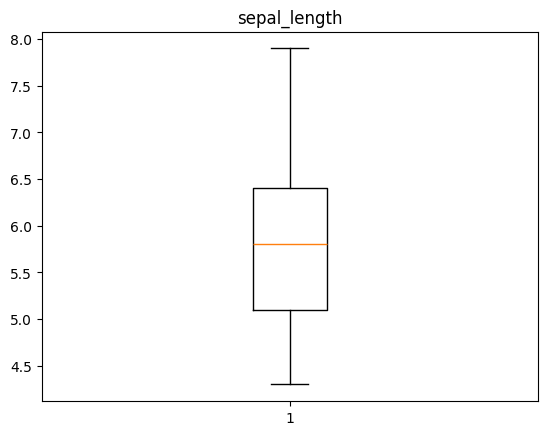

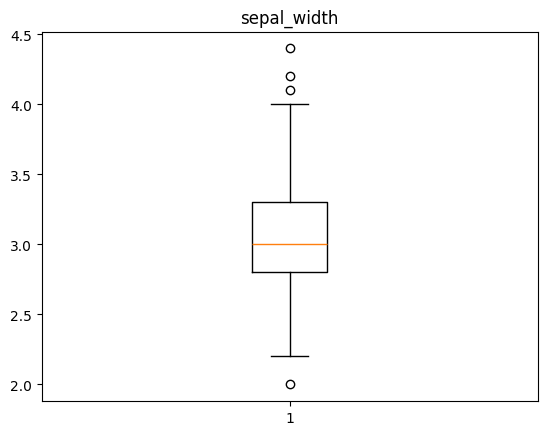

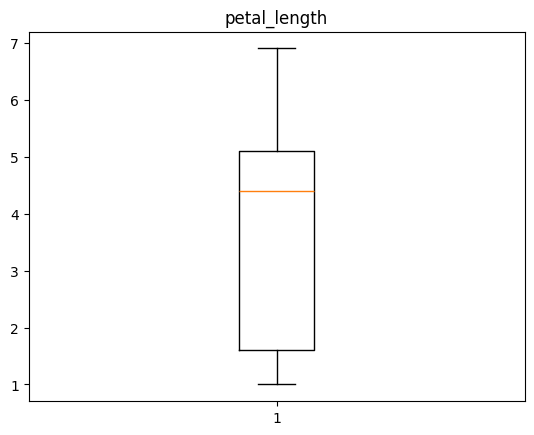

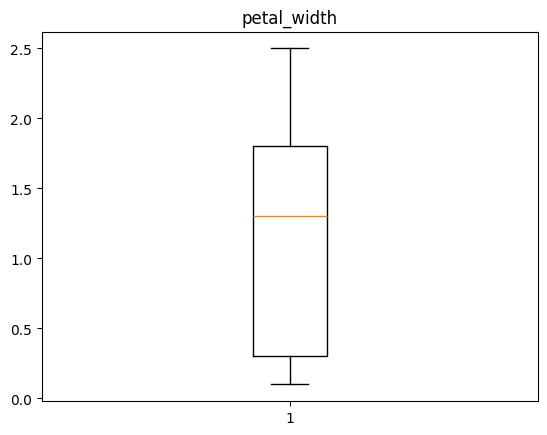

In [12]:
for x in numerical_columns:
    plt.boxplot(df[x])
    plt.title(x)
    plt.show()

In [13]:
import numpy as np

### ENCODING SPECIES COLUMN WITH LABEL ENCODING METHOD

In [14]:
from sklearn import  preprocessing

In [15]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
label_enc = preprocessing.LabelEncoder()

In [17]:
label_enc.fit_transform(df.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
df['species'] = label_enc.fit_transform(df.species)

### THIS IS A CLASSIFICATION TASK
#### it is when your label output(Y) is categorical

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df['species'].unique()

array([0, 1, 2])

In [21]:
x = df.drop('species', axis = 1)
y = df['species']

In [22]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

### SPLIT X AND Y INTO TRAINING AND TEST SET

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Split x and y into training, use 80% as train set and 20% as test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [26]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(147, 4)
(117, 4)
(30, 4)


### MODEL TRAINING
#### Kneighbor classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Initialize the knn classifier
knn = KNeighborsClassifier(n_neighbors = 10)

In [29]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### MODEL EVALUATION

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
y_pred = knn.predict(x_test)

In [32]:
y_pred

array([2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1,
       0, 1, 0, 2, 0, 2, 0, 2])

In [33]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [34]:
df.shape

(147, 5)

In [35]:
matrix = confusion_matrix(y_test, y_pred)

In [36]:
import seaborn as sns

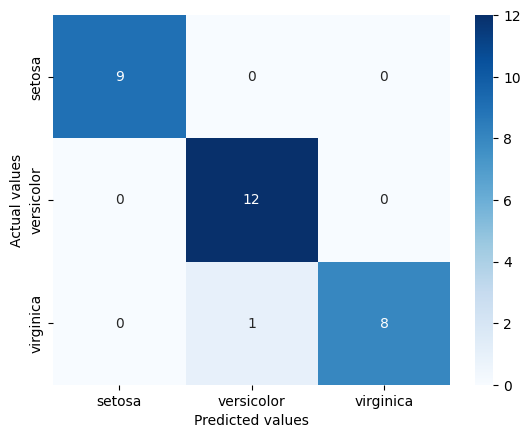

In [38]:
sns.heatmap(matrix, cmap = 'Blues', annot = True, xticklabels = species_categories, yticklabels = species_categories)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()